In [1]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

In [98]:
# read and add shapefile to notebook
df = pd.read_csv('Data/R13559086_SL140.csv')

In [99]:
# try to see all the data and display a sample row
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.sample()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_PUMA5,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017,Low-Income,Middle-Income,High-Income
527,6037197500,"Census Tract 1975, Los Angeles County, California",ca,140,0,NaN,NaN,NaN,6,37,NaN,NaN,197500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1975,NaN,NaN,NaN,1746,102,8,28,33,66,65,85,12,13,102,186,374,261,69,118,224,5.84,0.46,1.6,1.89,3.78,3.72,4.87,0.69,0.74,5.84,10.65,21.42,14.95,3.95,6.76,12.83,412,992,342


In [100]:
# convert FIPS, STATE, and COUNTY to string
df = pd.read_csv(
    'Data/R13559086_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_PUMA5,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017,Low-Income,Middle-Income,High-Income
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1011.10,NaN,NaN,NaN,1551,67,96,33,72,11,78,19,56,96,74,221,102,182,144,123,177,4.32,6.19,2.13,4.64,0.71,5.03,1.23,3.61,6.19,4.77,14.25,6.58,11.73,9.28,7.93,11.41,528,723,300
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1011.22,NaN,NaN,NaN,1383,84,0,7,44,20,29,0,4,10,31,208,173,102,181,204,286,6.07,0.00,0.51,3.18,1.45,2.10,0.00,0.29,0.72,2.24,15.04,12.51,7.38,13.09,14.75,20.68,198,695,490
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.20,NaN,NaN,NaN,1349,85,61,9,91,24,24,71,39,60,81,209,172,43,109,130,141,6.30,4.52,0.67,6.75,1.78,1.78,5.26,2.89,4.45,6.00,15.49,12.75,3.19,8.08,9.64,10.45,464,614,271
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.21,NaN,NaN,NaN,1424,84,90,59,136,26,107,9,91,65,145,95,150,140,65,111,51,5.90,6.32,4.14,9.55,1.83,7.51,0.63,6.39,4.56,10.18,6.67,10.53,9.83,4.56,7.79,3.58,667,595,162
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.22,NaN,NaN,NaN,928,68,182,60,29,33,55,52,19,27,23,23,107,26,137,35,52,7.33,19.61,6.47,3.12,3.56,5.93,5.60,2.05,2.91,2.48,2.48,11.53,2.80,14.76,3.77,5.60,525,316,87


In [101]:
# check which columns are null columns
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [102]:
# delete null columns
df = df.dropna(axis=1,how="all")

In [103]:
# define the columns that I want to keep
columns_to_keep = ['Geo_FIPS',
                   'Low-Income',
                   'Middle-Income',
                   'High-Income']

In [104]:
# save these columns
df2 = df[columns_to_keep]

In [105]:
# rename these columns associate with household income
df2.columns = ['FIPS',
'Low-Income',
'Middle-Income',
'High-Income']

In [106]:
# display five random samples to confirm the columns rename successfully
df2.sample(5)

,FIPS,Low-Income,Middle-Income,High-Income
3,06037101221,667,595,162
1265,06037403722,638,756,284
548,06037201402,425,796,280
1954,06037570602,596,797,291
209,06037124104,521,435,97


In [107]:
# read in a geojson file 
tracts=gpd.read_file('Data/Census_Tracts_2020.geojson')

In [108]:
# only keep FIPS and geometry
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [109]:
# create a FIPS column
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [110]:
# create a new dataframe based on the join
tracts['FIPS'] = tracts['FIPS'].astype(int)
df2['FIPS'] = df2['FIPS'].astype(int)

# Merge the DataFrames
tracts_income = tracts.merge(df2, on='FIPS')

/tmp/ipykernel_4027/2312057885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FIPS'] = df2['FIPS'].astype(int)


In [111]:
# check it
tracts_income.head()

,CT20,geometry,FIPS,Low-Income,Middle-Income,High-Income
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,528,723,300
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",6037101122,198,695,490
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",6037101220,464,614,271
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",6037101221,667,595,162
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",6037101222,525,316,87


## Public Transit Moran Plot

In [20]:
# read and add shapefile to notebook
file = gpd.read_file('Data/Major_Safety_Events.csv')

In [21]:
# list of desired column names
desired_columns =['Year','Latitude','Longitude','LatLon']

In [22]:
# trimming the dataset
data_trimmed = file[desired_columns].copy()

In [23]:
# show data only from 2018 to 2022
data_trimmed[data_trimmed['Year'].isin(['2018', '2019', '2020', '2021', '2022'])]
# trimming the dataset
new_data_trimmed = data_trimmed[data_trimmed['Year'].isin(['2018', '2019', '2020', '2021', '2022'])].copy()

In [26]:
# convert pandas dataframe to geodataframe
new_data_trimmed = gpd.GeoDataFrame(new_data_trimmed, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(new_data_trimmed.Longitude, new_data_trimmed.Latitude))

In [27]:
# convert lat/lon to floats
new_data_trimmed.Longitude = new_data_trimmed.Longitude.astype('float')
new_data_trimmed.Latitude = new_data_trimmed.Latitude.astype('float')

In [29]:
# subset the zero coordinate records
new_data_trimmed[new_data_trimmed.Longitude==0]

,Year,Latitude,Longitude,LatLon,geometry


In [32]:
# drop the unmapped rows
new_data_trimmed = new_data_trimmed[new_data_trimmed.Longitude!=0]

In [35]:
# check number of records before join
new_data_trimmed.shape

(1052, 5)

In [36]:
# Do the spatial join
join = gpd.sjoin(tracts_income, new_data_trimmed, how='left')

In [37]:
# check number of records after join
join.shape

(3047, 11)

In [38]:
public = join.FIPS.value_counts().rename_axis('FIPS').reset_index(name='public_accident_count')
public

,FIPS,public_accident_count
0,6037540600,29
1,6037224020,22
2,6037701902,17
3,6037226001,15
4,6037208903,14
5,6037207901,12
6,6037543203,12
7,6037224010,12
8,6037542602,11
9,6037207400,10


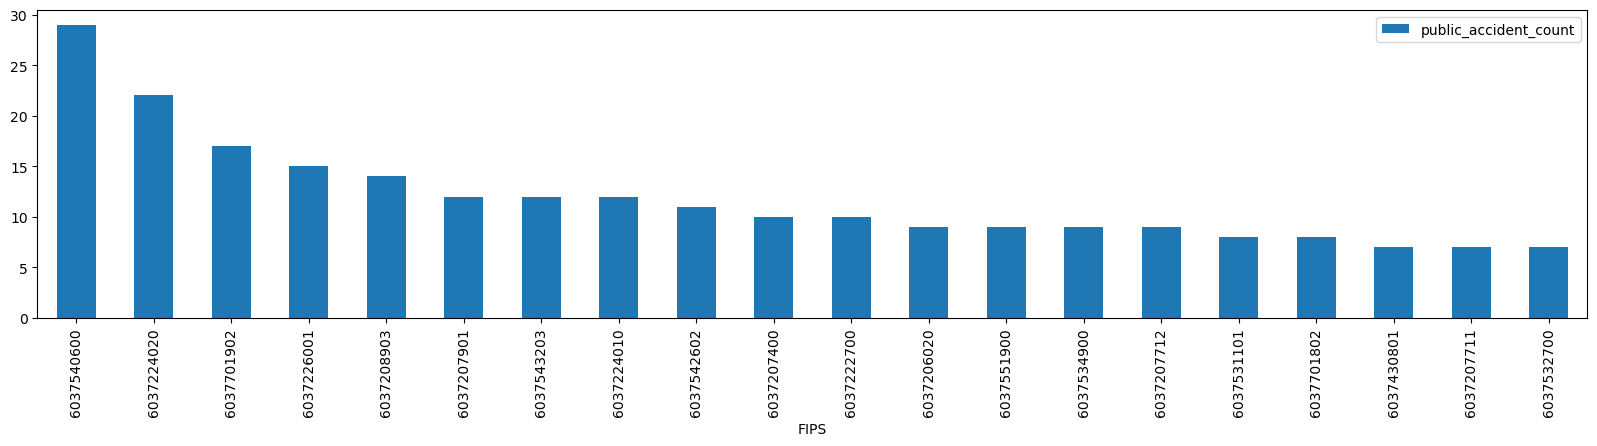

In [39]:
# make a bar chart of top 20 geographies
public[:20].plot.bar(figsize=(20,4),
                             x='FIPS',
                             y='public_accident_count')
plt.savefig('Top 20 FIPS public1')

In [40]:
# join the summary table back to the gdf
tracts_income=tracts_income.merge(public,on='FIPS')

In [41]:
# our block group table now has a count column
tracts_income.sample(10)

,CT20,geometry,FIPS,Low-Income,Middle-Income,High-Income,public_accident_count
343,138000,"POLYGON ((-118.58783 34.15745, -118.58792 34.1...",6037138000,272,758,802,1
1633,503801,"POLYGON ((-117.98606 33.90274, -117.98690 33.9...",6037503801,204,752,256,1
2362,910218,"POLYGON ((-118.12796 34.64588, -118.12832 34.6...",6037910218,514,684,286,1
1499,463800,"POLYGON ((-118.16777 34.14147, -118.16767 34.1...",6037463800,251,304,961,1
1137,302104,"POLYGON ((-118.22797 34.14694, -118.22788 34.1...",6037302104,427,798,166,1
338,137401,"POLYGON ((-118.60582 34.15443, -118.60582 34.1...",6037137401,212,655,700,1
869,239310,"POLYGON ((-118.28024 33.97467, -118.27831 33.9...",6037239310,418,422,84,1
1506,480011,"POLYGON ((-118.06790 34.13073, -118.06811 34.1...",6037480011,643,733,378,1
2119,602602,"POLYGON ((-118.32652 33.90920, -118.32650 33.9...",6037602602,421,472,196,1
2364,910302,"POLYGON ((-118.21002 34.63095, -118.21164 34.6...",6037910302,475,792,794,1


In [42]:
tracts_income['low_public_per_1000'] = tracts_income['public_accident_count']/tracts_income['Low-Income']*1000

In [43]:
import numpy as np
tracts_income['low_public_per_1000'].replace([np.inf, -np.inf], 0, inplace=True)

In [44]:
tracts_income.sort_values(by="low_public_per_1000").tail()

,CT20,geometry,FIPS,Low-Income,Middle-Income,High-Income,public_accident_count,low_public_per_1000
2472,980014,"POLYGON ((-118.22459 33.82439, -118.22469 33.8...",6037980014,6,4,0,1,166.666667
580,206020,"POLYGON ((-118.22676 34.06225, -118.22675 34.0...",6037206020,49,111,91,9,183.673469
2477,980019,"POLYGON ((-118.53452 34.13038, -118.53451 34.1...",6037980019,5,22,13,1,200.000000
1210,401901,"POLYGON ((-117.70167 34.10682, -117.70284 34.1...",6037401901,5,95,10,1,200.000000
117,115103,"POLYGON ((-118.52334 34.25734, -118.52373 34.2...",6037115103,4,4,0,1,250.000000


In [45]:
tracts_income['middle_public_per_1000'] = tracts_income['public_accident_count']/tracts_income['Middle-Income']*1000
tracts_income['middle_public_per_1000'].replace([np.inf, -np.inf], 0, inplace=True)

In [46]:
tracts_income.sort_values(by="middle_public_per_1000").tail()

,CT20,geometry,FIPS,Low-Income,Middle-Income,High-Income,public_accident_count,low_public_per_1000,middle_public_per_1000
2487,980031,"POLYGON ((-118.26315 33.76749, -118.26339 33.7...",6037980031,0,5,0,1,0.000000,200.000000
2472,980014,"POLYGON ((-118.22459 33.82439, -118.22469 33.8...",6037980014,6,4,0,1,166.666667,250.000000
2469,980011,"POLYGON ((-118.22550 33.78986, -118.22583 33.7...",6037980011,12,4,19,1,83.333333,250.000000
117,115103,"POLYGON ((-118.52334 34.25734, -118.52373 34.2...",6037115103,4,4,0,1,250.000000,250.000000
2482,980024,"POLYGON ((-118.47042 34.18044, -118.47293 34.1...",6037980024,27,7,26,4,148.148148,571.428571


In [47]:
tracts_income['high_public_per_1000'] = tracts_income['public_accident_count']/tracts_income['High-Income']*1000
tracts_income['high_public_per_1000'].replace([np.inf, -np.inf], 0, inplace=True)

In [48]:
tracts_income.sort_values(by="high_public_per_1000").tail()

,CT20,geometry,FIPS,Low-Income,Middle-Income,High-Income,public_accident_count,low_public_per_1000,middle_public_per_1000,high_public_per_1000
1776,540600,"POLYGON ((-118.22834 33.92073, -118.22861 33.9...",6037540600,637,466,71,29,45.525903,62.231760,408.450704
2474,980016,"POLYGON ((-118.21573 34.01509, -118.21627 34.0...",6037980016,23,66,2,1,43.478261,15.151515,500.000000
1813,543203,"POLYGON ((-118.22051 33.88861, -118.22152 33.8...",6037543203,601,456,21,12,19.966722,26.315789,571.428571
763,224020,"POLYGON ((-118.26490 34.02431, -118.26482 34.0...",6037224020,630,256,28,22,34.920635,85.937500,785.714286
772,226001,"POLYGON ((-118.24322 34.02360, -118.24330 34.0...",6037226001,338,220,19,15,44.378698,68.181818,789.473684


In [57]:
y = tracts_income['low_public_per_1000']

In [58]:
new_coefficient = 1.5

In [59]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
threshold_low = Q1 - new_coefficient * IQR
threshold_high = Q3 + new_coefficient * IQR

In [60]:
y = y[(y > threshold_low) & (y < threshold_high)]

In [61]:
new_tracts_income = tracts_income.loc[y.index]

In [62]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(new_tracts_income,k=8)

# Row-standardization
wq.transform = 'r'

In [63]:
y = new_tracts_income.low_public_per_1000
moran = Moran(y, wq)
moran.I

0.12970475505521256

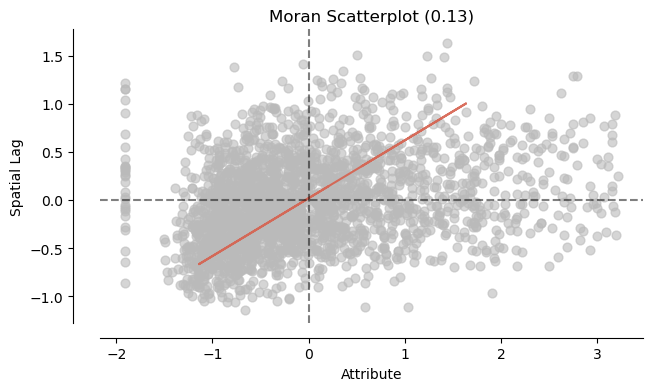

In [64]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.savefig('Moran Low Public1')
plt.show()

/opt/conda/lib/python3.11/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


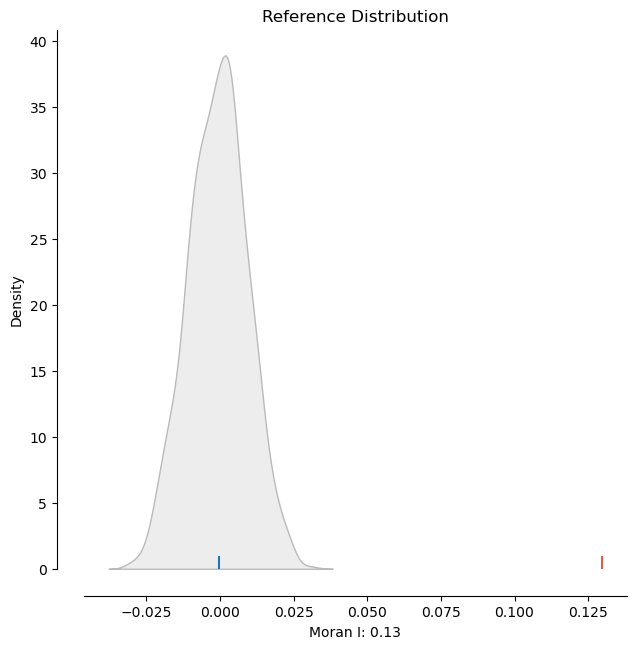

In [65]:
plot_moran_simulation(moran,aspect_equal=False)
plt.savefig('Moran Low Public Distribution1')

In [66]:
moran.p_sim

0.001

In [70]:
y = tracts_income['middle_public_per_1000']

In [71]:
new_coefficient = 1.5

In [72]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
threshold_low = Q1 - new_coefficient * IQR
threshold_high = Q3 + new_coefficient * IQR

In [73]:
y = y[(y > threshold_low) & (y < threshold_high)]

In [74]:
new_tracts_income = tracts_income.loc[y.index]

In [75]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(new_tracts_income,k=8)

# Row-standardization
wq.transform = 'r'

In [76]:
y = new_tracts_income.middle_public_per_1000
moran = Moran(y, wq)
moran.I

0.13850480166390228

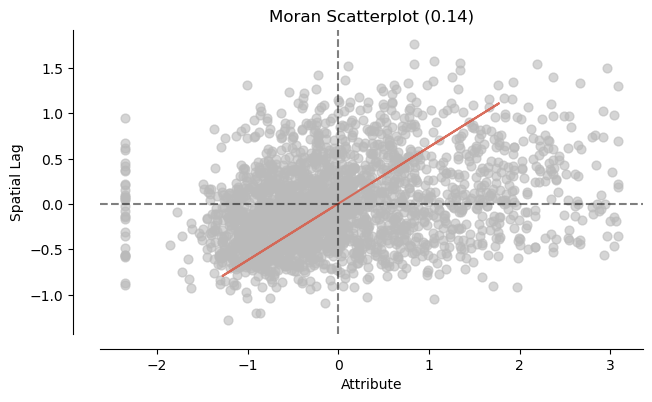

In [77]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.savefig('Moran Middle Public1')
plt.show()

/opt/conda/lib/python3.11/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


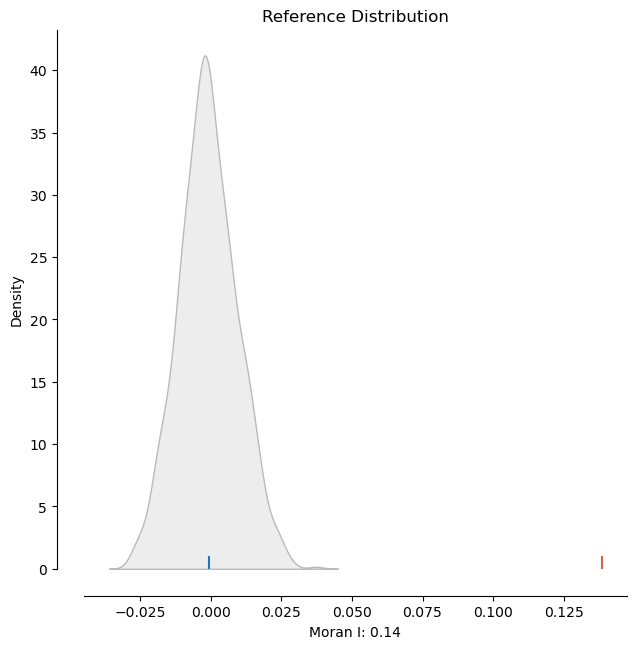

In [78]:
plot_moran_simulation(moran,aspect_equal=False)
plt.savefig('Moran Middle Public Distribution1')

In [79]:
moran.p_sim

0.001

In [80]:
y = tracts_income['high_public_per_1000']

In [81]:
new_coefficient = 1.5

In [82]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
threshold_low = Q1 - new_coefficient * IQR
threshold_high = Q3 + new_coefficient * IQR

In [83]:
y = y[(y > threshold_low) & (y < threshold_high)]

In [84]:
new_tracts_income = tracts_income.loc[y.index]

In [85]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(new_tracts_income,k=8)

# Row-standardization
wq.transform = 'r'

In [86]:
y = new_tracts_income.high_public_per_1000
moran = Moran(y, wq)
moran.I

0.4421589996011731

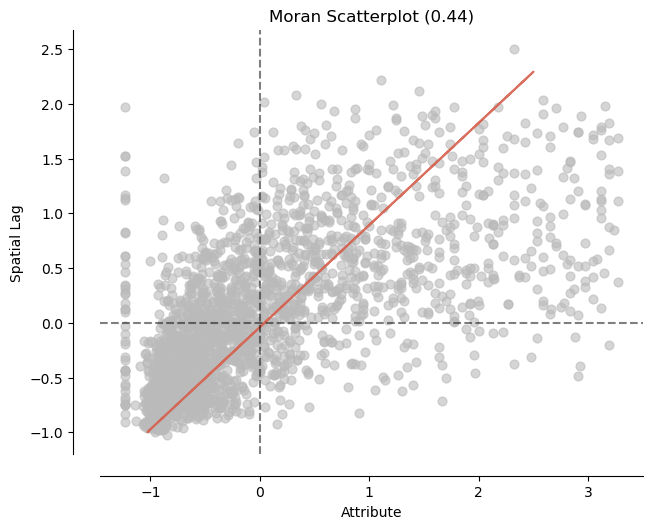

In [87]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.savefig('Moran High Public1')
plt.show()

/opt/conda/lib/python3.11/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


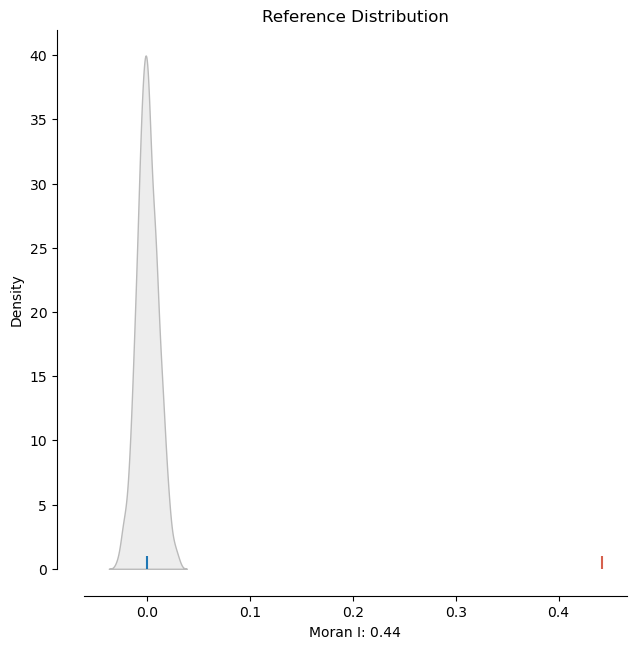

In [88]:
plot_moran_simulation(moran,aspect_equal=False)
plt.savefig('Moran High Public Distribution1')

In [89]:
moran.p_sim

0.001

Based on Moran plot, there is no significant spatial autocorrelation between low-income household/middle-income household and number of public transit accident. The possible reason could be that the sample of public transit accident is not enough, many census tract has zero public transit accidents in it. But high-income household has spatial autocorrelation with number of public transit accident. 

## Private Vehicle Accidents Moran Plot

In [90]:
private = pd.read_csv('Data/Traffic_Collision_Data_2018_to_2022.csv')

In [91]:
private.shape

(191371, 18)

In [92]:
from shapely.geometry import Point
import ast
private['geometry'] = private['Location'].apply(
    lambda loc: Point(
        [float(coord) for coord in ast.literal_eval(loc)]
    )
)


private_gdf = gpd.GeoDataFrame(private, crs='EPSG:4326')

In [93]:
private['lat'] = private['Location'].apply(lambda x: float(x.split(',')[0].strip('()')))
private['lon'] = private['Location'].apply(lambda x: float(x.split(',')[1].strip('()')))

In [94]:
private = gpd.GeoDataFrame(private, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(private.lon, private.lat))

In [95]:
# convert lat/lon to floats
private.lon = private.lon.astype('float')
private.lat = private.lat.astype('float')

In [96]:
# subset the zero coordinate records
private[private.lon==0]
# drop the unmapped rows
private = private[private.lon!=0]

In [97]:
# check number of records before join
private.shape

(190972, 21)

In [112]:
# Do the spatial join
join = gpd.sjoin(tracts_income, private, how='left')

In [113]:
# check number of records after join
join.shape

(192239, 27)

In [114]:
private_acc = join.FIPS.value_counts().rename_axis('FIPS').reset_index(name='private_accident_count')
private_acc

,FIPS,private_accident_count
0,6037980028,1531
1,6037226002,1179
2,6037206051,1104
3,6037224020,867
4,6037207400,756
5,6037207711,753
6,6037127210,736
7,6037211000,683
8,6037190701,661
9,6037237300,657


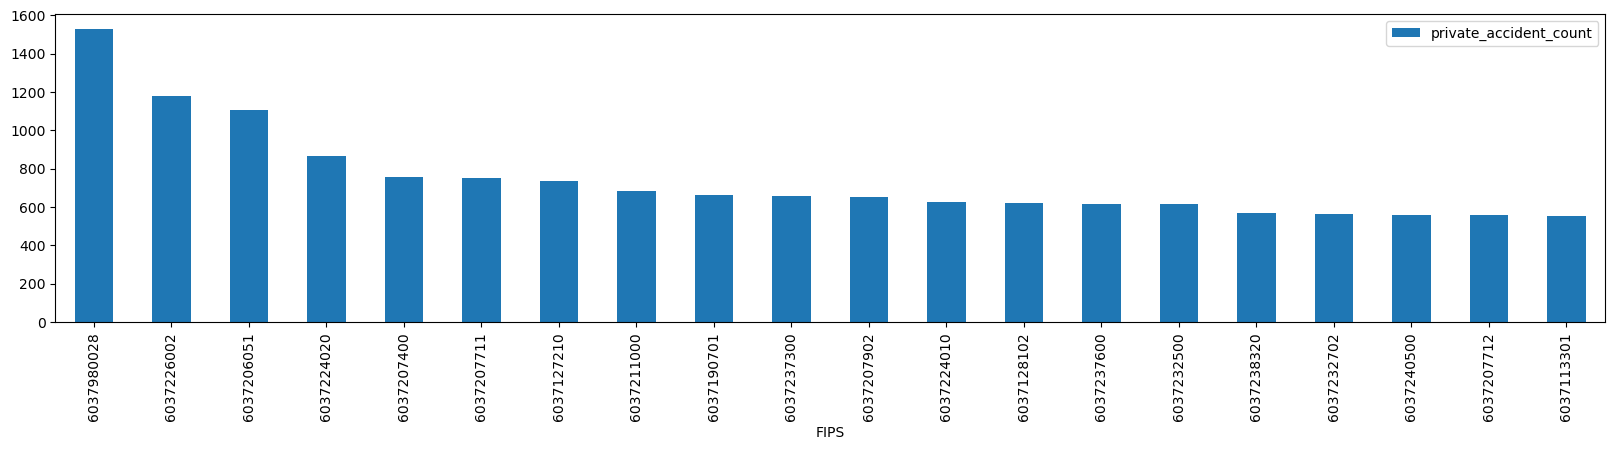

In [115]:
# make a bar chart of top 20 geographies
private_acc[:20].plot.bar(figsize=(20,4),
                             x='FIPS',
                             y='private_accident_count')
plt.savefig('Top 20 FIPS private1')

In [116]:
# join the summary table back to the gdf
tracts_income=tracts_income.merge(private_acc,on='FIPS')

In [117]:
# our block group table now has a count column
tracts_income.sample(10)

,CT20,geometry,FIPS,Low-Income,Middle-Income,High-Income,private_accident_count
1541,481604,"POLYGON ((-118.12806 34.07830, -118.12680 34.0...",6037481604,413,749,222,1
728,218900,"POLYGON ((-118.31767 34.02993, -118.31767 34.0...",6037218900,1064,796,289,256
129,117201,"POLYGON ((-118.46747 34.23916, -118.46743 34.2...",6037117201,571,520,128,264
116,115101,"POLYGON ((-118.50258 34.23213, -118.50257 34.2...",6037115101,495,395,905,241
26,104321,"POLYGON ((-118.42030 34.26741, -118.41928 34.2...",6037104321,474,328,18,82
2123,602900,"POLYGON ((-118.30841 33.91646, -118.30851 33.9...",6037602900,356,809,164,1
2203,650904,"POLYGON ((-118.32679 33.83133, -118.32735 33.8...",6037650904,173,431,378,1
2265,702002,"POLYGON ((-118.47991 34.00980, -118.48043 34.0...",6037702002,1103,1158,1084,1
1341,408005,"POLYGON ((-117.89188 34.05731, -117.89311 34.0...",6037408005,275,742,673,1
1322,407101,"POLYGON ((-117.96771 34.04101, -117.96739 34.0...",6037407101,306,608,198,1


In [118]:
tracts_income['low_private_per_1000'] = tracts_income['private_accident_count']/tracts_income['Low-Income']*1000
tracts_income['low_private_per_1000'].replace([np.inf, -np.inf], 0, inplace=True)

In [119]:
tracts_income.sort_values(by="low_private_per_1000").tail()

,CT20,geometry,FIPS,Low-Income,Middle-Income,High-Income,private_accident_count,low_private_per_1000
582,206051,"POLYGON ((-118.23121 34.04152, -118.23137 34.0...",6037206051,133,336,413,1104,8300.751880
2466,980008,"POLYGON ((-118.49909 34.22160, -118.49903 34.2...",6037980008,26,0,0,409,15730.769231
2482,980024,"POLYGON ((-118.47042 34.18044, -118.47293 34.1...",6037980024,27,7,26,433,16037.037037
117,115103,"POLYGON ((-118.52334 34.25734, -118.52373 34.2...",6037115103,4,4,0,147,36750.000000
2472,980014,"POLYGON ((-118.22459 33.82439, -118.22469 33.8...",6037980014,6,4,0,283,47166.666667


In [120]:
tracts_income['middle_private_per_1000'] = tracts_income['private_accident_count']/tracts_income['Middle-Income']*1000
tracts_income['middle_private_per_1000'].replace([np.inf, -np.inf], 0, inplace=True)

In [121]:
tracts_income.sort_values(by="middle_private_per_1000").tail()

,CT20,geometry,FIPS,Low-Income,Middle-Income,High-Income,private_accident_count,low_private_per_1000,middle_private_per_1000
2468,980010,"POLYGON ((-118.22709 34.08087, -118.22725 34.0...",6037980010,75,17,0,249,3320.000000,14647.058824
117,115103,"POLYGON ((-118.52334 34.25734, -118.52373 34.2...",6037115103,4,4,0,147,36750.000000,36750.000000
2482,980024,"POLYGON ((-118.47042 34.18044, -118.47293 34.1...",6037980024,27,7,26,433,16037.037037,61857.142857
2487,980031,"POLYGON ((-118.26315 33.76749, -118.26339 33.7...",6037980031,0,5,0,333,0.000000,66600.000000
2472,980014,"POLYGON ((-118.22459 33.82439, -118.22469 33.8...",6037980014,6,4,0,283,47166.666667,70750.000000


In [122]:
tracts_income['high_private_per_1000'] = tracts_income['private_accident_count']/tracts_income['High-Income']*1000
tracts_income['high_private_per_1000'].replace([np.inf, -np.inf], 0, inplace=True)

In [123]:
tracts_income.sort_values(by="high_private_per_1000").tail()

,CT20,geometry,FIPS,Low-Income,Middle-Income,High-Income,private_accident_count,low_private_per_1000,middle_private_per_1000,high_private_per_1000
456,190101,"POLYGON ((-118.33838 34.10414, -118.33936 34.1...",6037190101,552,645,10,294,532.608696,455.813953,29400.000000
763,224020,"POLYGON ((-118.26490 34.02431, -118.26482 34.0...",6037224020,630,256,28,867,1376.190476,3386.718750,30964.285714
2479,980021,"POLYGON ((-118.36146 34.27318, -118.36203 34.2...",6037980021,0,0,4,163,0.000000,0.000000,40750.000000
158,120030,"POLYGON ((-118.44870 34.21192, -118.44870 34.2...",6037120030,415,290,4,180,433.734940,620.689655,45000.000000
2474,980016,"POLYGON ((-118.21573 34.01509, -118.21627 34.0...",6037980016,23,66,2,142,6173.913043,2151.515152,71000.000000


In [124]:
y = tracts_income['low_private_per_1000']

In [125]:
new_coefficient = 1.5

In [126]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
threshold_low = Q1 - new_coefficient * IQR
threshold_high = Q3 + new_coefficient * IQR

In [127]:
y = y[(y > threshold_low) & (y < threshold_high)]

In [128]:
new_tracts_income = tracts_income.loc[y.index]

In [129]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(new_tracts_income,k=8)

# Row-standardization
wq.transform = 'r'

In [130]:
y = new_tracts_income.low_private_per_1000
moran = Moran(y, wq)
moran.I

0.6021579446588912

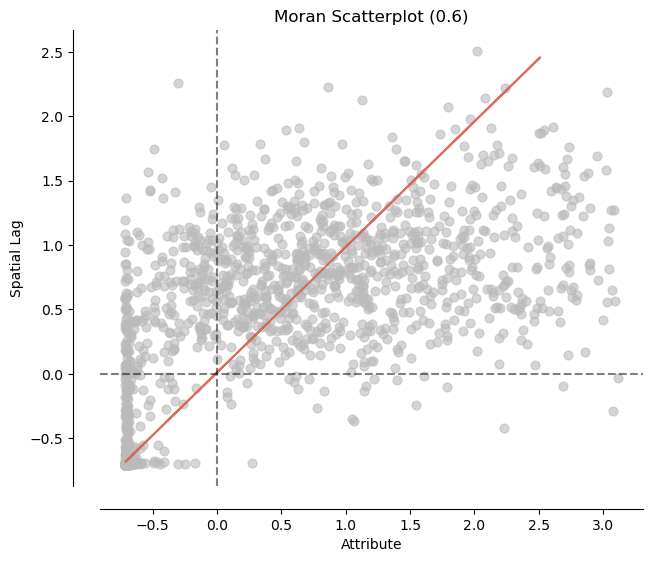

In [131]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.savefig('Moran Low Private1')
plt.show()

/opt/conda/lib/python3.11/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


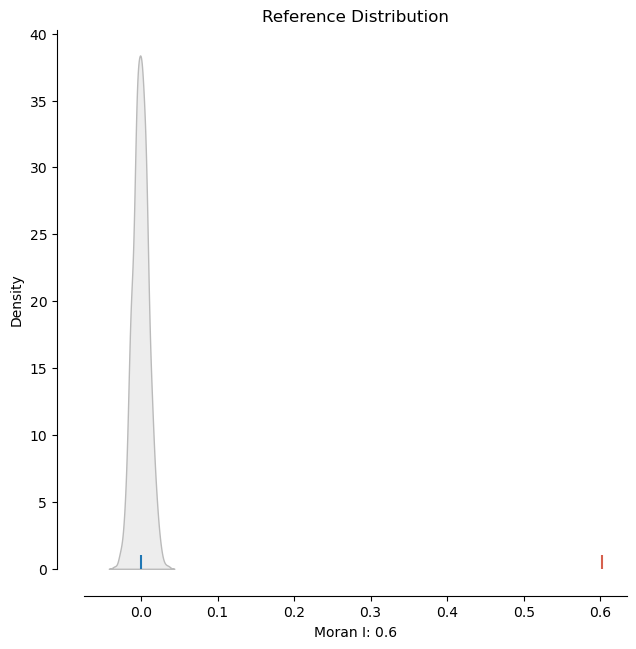

In [132]:
plot_moran_simulation(moran,aspect_equal=False)
plt.savefig('Moran Low Private Distribution1')

In [133]:
moran.p_sim

0.001

In [134]:
y = tracts_income['middle_private_per_1000']

In [135]:
new_coefficient = 1.5

In [136]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
threshold_low = Q1 - new_coefficient * IQR
threshold_high = Q3 + new_coefficient * IQR

In [137]:
y = y[(y > threshold_low) & (y < threshold_high)]

In [138]:
new_tracts_income = tracts_income.loc[y.index]

In [139]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(new_tracts_income,k=8)

# Row-standardization
wq.transform = 'r'

In [140]:
y = new_tracts_income.middle_private_per_1000
moran = Moran(y, wq)
moran.I

0.635836248639245

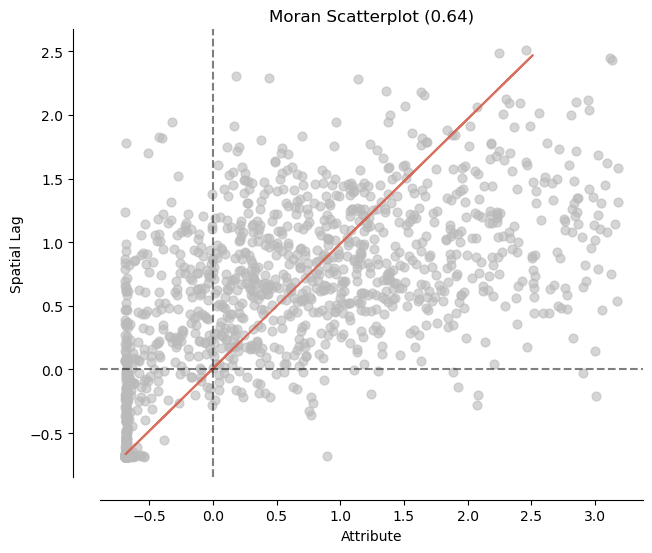

In [141]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.savefig('Moran Middle Private1')
plt.show()

/opt/conda/lib/python3.11/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


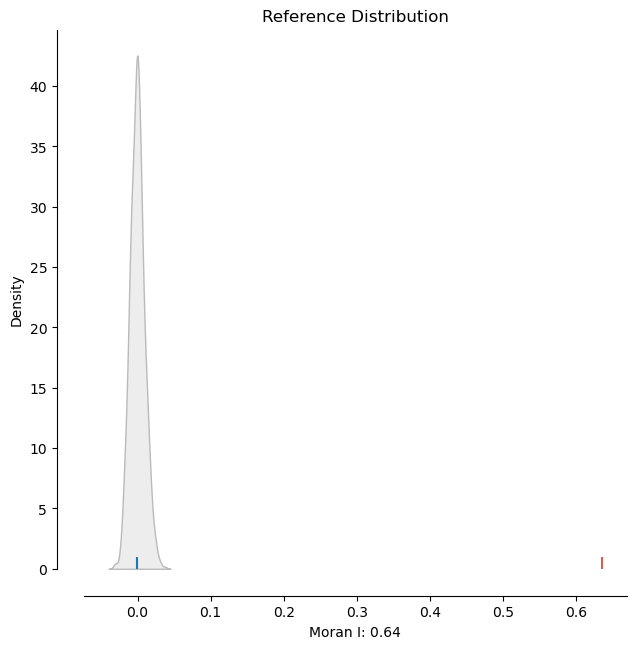

In [142]:
plot_moran_simulation(moran,aspect_equal=False)
plt.savefig('Moran Middle Private Distribution1')

In [143]:
moran.p_sim

0.001

In [144]:
y = tracts_income['high_private_per_1000']

In [145]:
new_coefficient = 1.5

In [146]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
threshold_low = Q1 - new_coefficient * IQR
threshold_high = Q3 + new_coefficient * IQR

In [147]:
y = y[(y > threshold_low) & (y < threshold_high)]

In [148]:
new_tracts_income = tracts_income.loc[y.index]

In [149]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(new_tracts_income,k=8)

# Row-standardization
wq.transform = 'r'

In [150]:
y = new_tracts_income.high_private_per_1000
moran = Moran(y, wq)
moran.I

0.5900836655504105

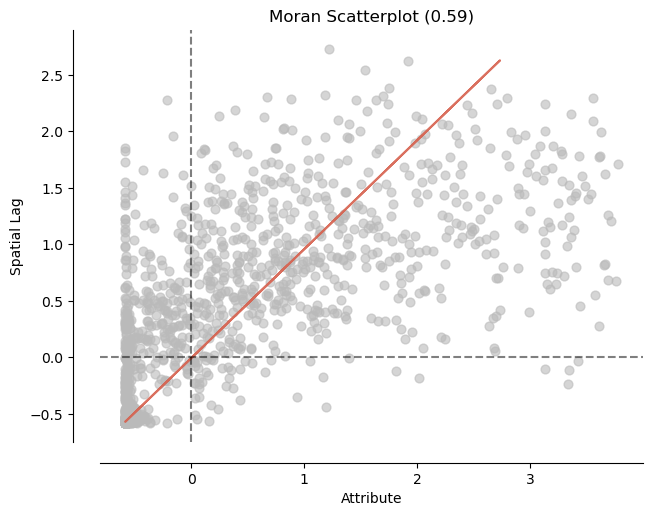

In [151]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.savefig('Moran High Private1')
plt.show()

/opt/conda/lib/python3.11/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


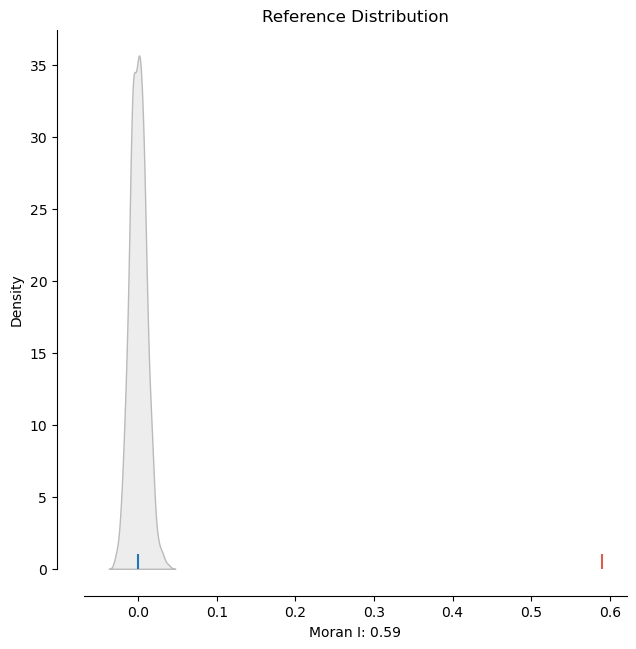

In [152]:
plot_moran_simulation(moran,aspect_equal=False)
plt.savefig('Moran High Private Distribution1')

In [153]:
moran.p_sim

0.001

Based on Moran plot, all the three categories of household income shows strong spatial autocorrelation with number of private transit accident.